Description: 
This is a sentiment analysis program the parses the tweets fetched from Twitter using Python and several python libraries (tweepy, textblob, pandas, numpy, matplotlib, wordcloud, re) 

Note: you need a twitter account and a twitter application use https://developer.twitter.com/en/apps for more information and create an app and then you can use your own credentials. 

You can apply for API keys by getting a twitter developer account https://developer.twitter.com/en/apply-for-access 

To extract the tweets (api.user_timeline) elevated access wil be needed - which can be requested from the developer your account dashboard.

Tutorial form Computer Science channel 
https://www.youtube.com/watch?v=ujId4ipkBio

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [2]:
### To run on google colab include code below:
### Might have to run the cell twice after dialog should be displayed to select file
from google.colab import files
uploaded = files.upload()
### Get the data from Google drive or to run locally only need to add the path pd.read_csv(r'path_to_file/Login.csv') 
df = pd.read_csv('login.csv')

In [3]:
# Twitter keys
consumerKey = df['t_key'][0]
consumerSecret = df['t_key'][1]
accessToken = df['t_key'][2]
accessTokenSecret = df['t_key'][3]

In [4]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
# Extract 100 tweets from the twitter user
## reference https://docs.tweepy.org/en/stable/api.html#tweepy.API.user_timeline-
posts = api.user_timeline(screen_name = "SatyaNadella", count = 100, tweet_mode = "extended")

In [6]:
# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') '+ tweet.full_text + '\n')
    i += 1    

Show the 5 recent tweets: 

1) We’re removing limits on how and where you work with Windows 11 and Windows 365. Together, they bring the power of Azure computing to Windows computers. https://t.co/hSkSOuoG68

2) RT @Lindsay_Rae_M: "The one thing that is constant is that every one of us has a family, regardless of whether it is a family tree that con…

3) We’re applying what we’ve learned from past tech shifts, and taking a principled approach to security in the metaverse to help ensure we create a trusted environment that benefits everyone. https://t.co/OMfB2YIr57

4) RT @Fredhum: We are deeply concerned by numerous state actions that could create or encourage discrimination against LGBTQIA+ individuals.…

5) "These people aren’t statistics. Their stories need to be told." This story illustrates the agonizing missing persons’ tragedies that too many Indigenous people continue to face, and how technology can help suffering families find answers. https://t.co/rAwkgMKDii



In [20]:
# Create a dataframe with a column called Tweets
fulltext_df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data
fulltext_df.head()

,Tweets
0,We’re removing limits on how and where you wor...
1,"RT @Lindsay_Rae_M: ""The one thing that is cons..."
2,We’re applying what we’ve learned from past te...
3,RT @Fredhum: We are deeply concerned by numero...
4,"""These people aren’t statistics. Their stories..."


In [25]:
# Show the last 5 rows of data
fulltext_df.tail()

,Tweets,Subjectivity,Polarity
95,"On the 31st Anniversary of the ADA, this impor...",0.80,0.3
96,I’m feeling optimistic about the rapid pace o...,0.00,0.0
97,Congrats to the on a long-awaited and well-de...,0.75,1.0
98,@_MAnant Thank you to all of our employees in ...,0.50,0.5
99,"Thank you, Rebecca. It was great to share you...",0.75,0.8


In [28]:
### Clean the data

# Create a function to clean the tweets
def clean_text(text):
    text = re.sub(r'@[_A-Za-z0-9]+', '', text)  # removes @mentions
    text = re.sub(r'#', '', text)              # removes the # symbol
    text = re.sub(r'RT[\s]+', '', text)        # removes RT - retweets
    text = re.sub(r'https?:\/\/\S+', '', text) # removes the hyperlink
    
    return text

# Cleaning the text
fulltext_df['Tweets'] = fulltext_df['Tweets'].apply(clean_text)

# show the clean text
fulltext_df    

,Tweets,Subjectivity,Polarity
0,We’re removing limits on how and where you wor...,0.000000,0.00
1,"_Rae_M ""The one thing that is constant is that...",0.333333,0.00
2,We’re applying what we’ve learned from past te...,0.250000,-0.25
3,We are deeply concerned by numerous state act...,0.450000,0.00
4,"""These people aren’t statistics. Their stories...",0.275000,0.15
...,...,...,...
95,"On the 31st Anniversary of the ADA, this impor...",0.800000,0.30
96,I’m feeling optimistic about the rapid pace o...,0.000000,0.00
97,Congrats to the on a long-awaited and well-de...,0.750000,1.00
98,Thank you to all of our employees in India wh...,0.500000,0.50


In [29]:
# Create a function to get the subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
                    
# Create a function to get the polarity (positive/negative) 
## reference - https://textblob.readthedocs.io/en/dev/quickstart.html
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
               
# Create two new columns
fulltext_df['Subjectivity'] = fulltext_df['Tweets'].apply(get_subjectivity)
fulltext_df['Polarity'] = fulltext_df['Tweets'].apply(get_polarity)                    

# Show the new dataframe
fulltext_df

,Tweets,Subjectivity,Polarity
0,We’re removing limits on how and where you wor...,0.000000,0.00
1,"_Rae_M ""The one thing that is constant is that...",0.333333,0.00
2,We’re applying what we’ve learned from past te...,0.250000,-0.25
3,We are deeply concerned by numerous state act...,0.450000,0.00
4,"""These people aren’t statistics. Their stories...",0.275000,0.15
...,...,...,...
95,"On the 31st Anniversary of the ADA, this impor...",0.800000,0.30
96,I’m feeling optimistic about the rapid pace o...,0.000000,0.00
97,Congrats to the on a long-awaited and well-de...,0.750000,1.00
98,Thank you to all of our employees in India wh...,0.500000,0.50


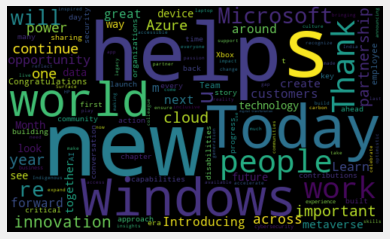

In [30]:
# Plot Word Cloud
## reference - https://amueller.github.io/word_cloud/references.html
all_words = ' '.join([twts for twts in fulltext_df['Tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(all_words)

# Display the generated image - the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
#Create a function to compute the negative, neutral, and positive analysis.
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
fulltext_df['Analysis'] = fulltext_df['Polarity'].apply(get_analysis)

fulltext_df

,Tweets,Subjectivity,Polarity,Analysis
0,We’re removing limits on how and where you wor...,0.000000,0.00,Neutral
1,"_Rae_M ""The one thing that is constant is that...",0.333333,0.00,Neutral
2,We’re applying what we’ve learned from past te...,0.250000,-0.25,Negative
3,We are deeply concerned by numerous state act...,0.450000,0.00,Neutral
4,"""These people aren’t statistics. Their stories...",0.275000,0.15,Positive
...,...,...,...,...
95,"On the 31st Anniversary of the ADA, this impor...",0.800000,0.30,Positive
96,I’m feeling optimistic about the rapid pace o...,0.000000,0.00,Neutral
97,Congrats to the on a long-awaited and well-de...,0.750000,1.00,Positive
98,Thank you to all of our employees in India wh...,0.500000,0.50,Positive


In [53]:
# Print all of the positive tweets
j = 1
sorted_df = fulltext_df.sort_values(by=['Polarity'])
print("------ Postive Tweets below ------")
for i in range(0, sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Positive'):
        print(f"{j}) {sorted_df['Tweets'][i]} | {sorted_df['Polarity'][i]}")
        print()
        j += 1

------ Postive Tweets below ------
1) "These people aren’t statistics. Their stories need to be told." This story illustrates the agonizing missing persons’ tragedies that too many Indigenous people continue to face, and how technology can help suffering families find answers.  | 0.15

2)  I always find GDC to be such an inspiring time. The industry coming together to do one of the most important things we can do,… | 0.35

3)  Our support for Ukraine is steadfast. We’ve increased our humanitarian aid, continue to detect and defend against cyber threat… | 0.4

4) This month at Microsoft we are recognizing and celebrating the enormous contributions of women across the world. Thank you Cynthia Per-Lee and  for your insights on how each of us can take action to ensure greater opportunity for all.  | 0.19999999999999998

5) _spataro The how, where, when &amp; even why of work is changing. We’re relying on data to inform our approach and are pleased to sha… | 0.5

6)  The Majorana, a near-ce

In [52]:
# Print the negative tweets
j = 1
sorted_df = fulltext_df.sort_values(by = ['Polarity'], ascending = 'False')
print("------ Negative Tweets below ------")
for i in range(0, sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Negative'):
        #print(str(j) + ') ' + sorted_df['Tweets'][i])
        print(f"{j}) {sorted_df['Tweets'][i]} | {sorted_df['Polarity'][i]}")
        j += 1           

------ Negative Tweets below ------
1) We’re applying what we’ve learned from past tech shifts, and taking a principled approach to security in the metaverse to help ensure we create a trusted environment that benefits everyone.  | -0.25
2)  Congratulations  and  on your new book, which presents a nuanced vision for the future of AI and what it could mean for all of us. | -0.058712121212121215
3)  Introducing Microsoft Start! A personalized feed tailored to your interests delivering news, weather, sports, and other conten… | -0.125


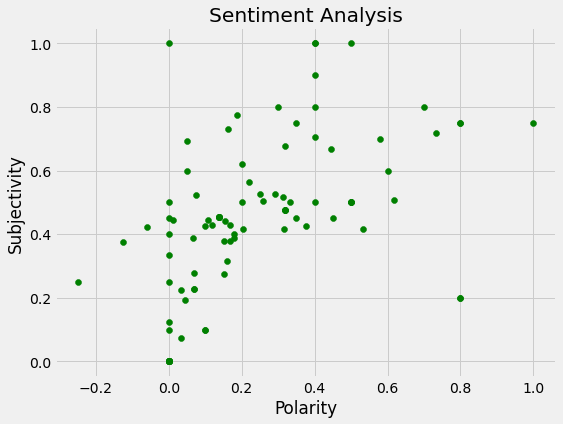

In [77]:
# Plot the polarity and subjectivity
plt.figure(figsize = (8, 6))
for i in range(0, fulltext_df.shape[0]): #.shape[0] indicates rows since shape return rows[0] & cols[1]           
  plt.scatter(fulltext_df['Polarity'][i], fulltext_df['Subjectivity'][i], color='Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [58]:
# Get the percentage of positive tweets
pos_tweets = fulltext_df[fulltext_df.Analysis == 'Positive']
pos_tweets = pos_tweets['Tweets']

# formula to get the positive tweets
pos_tweets_perc = round((pos_tweets.shape[0] / fulltext_df.shape[0]) * 100, 1)
pos_tweets_perc

76.0

In [72]:
# Get the percentage of negative tweets
neg_tweets = fulltext_df[fulltext_df.Analysis == 'Negative']
neg_tweets = neg_tweets['Tweets']
                         
neg_tweets_perc = round((neg_tweets.shape[0] / fulltext_df.shape[0]) * 100, 1)
neg_tweets_perc

3.0

In [59]:
# Get the percentage of neutral tweets
neu_tweets = fulltext_df[fulltext_df.Analysis == 'Neutral']
neu_tweets = neu_tweets['Tweets']
                         
neu_tweets_perc = round((neu_tweets.shape[0] / fulltext_df.shape[0]) * 100, 1)
neu_tweets_perc

21.0

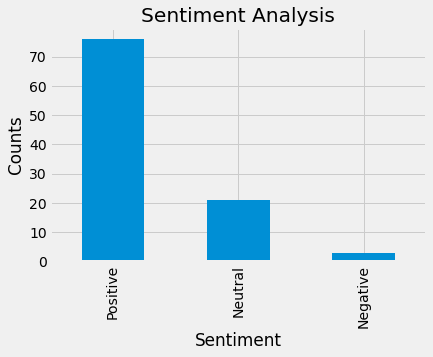

In [78]:
# Show the value counts
counts = fulltext_df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
counts.plot(kind = 'bar')
plt.show()

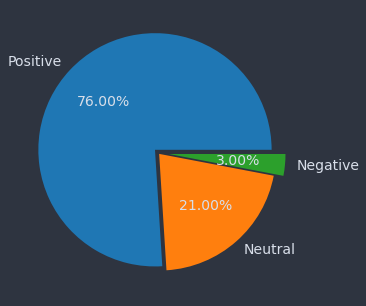

In [111]:
import matplotx
from IPython.core.pylabtools import figsize
plt.style.use(matplotx.styles.tab20r)

## reference: https://matplotlibguide.readthedocs.io/en/latest/Matplotlib/types.html#pie-chart
# Pie chart: explode and auto-percentage
PCounts = [pos_tweets_perc, neu_tweets_perc, neg_tweets_perc]
TSentiments = ['Positive', 'Neutral', 'Negative']
explode = [0.04, 0.01, 0.09]

#figsize: output figure window size
plt.figure(figsize=(5,5)) 

# autopct='%.2f %%': %.2f display value upto 2 decimal, 
# %% is used for displaying % at the end
plt.pie(PCounts, explode=explode, labels=TSentiments, autopct='%.2f%%') 

plt.show()